In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [3]:
df= pd.read_excel('microretailer_mit_lift_lab.xlsx') 
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [4]:
valores_nulos=df.isnull().sum()
valores_nulos

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop     73
318_shopkeeper_name                     123
319_shopkeepers_last_name               125
236_whatsapp                            129
235_email                               142
Length: 106, dtype: int64

In [5]:
df1=df.fillna(method='ffill')
df1=df1.fillna(method='bfill')
df1.isnull().sum()

C:\Users\Rene Vazquez\AppData\Local\Temp\ipykernel_7012\3481076202.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1=df.fillna(method='ffill')
C:\Users\Rene Vazquez\AppData\Local\Temp\ipykernel_7012\3481076202.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1=df1.fillna(method='bfill')


_record_id                              0
_title                                  0
_server_updated_at                      0
_updated_by                             0
_geometry                               0
                                       ..
234_willingness_participate_workshop    0
318_shopkeeper_name                     0
319_shopkeepers_last_name               0
236_whatsapp                            0
235_email                               0
Length: 106, dtype: int64

<Figure size 1500x800 with 0 Axes>

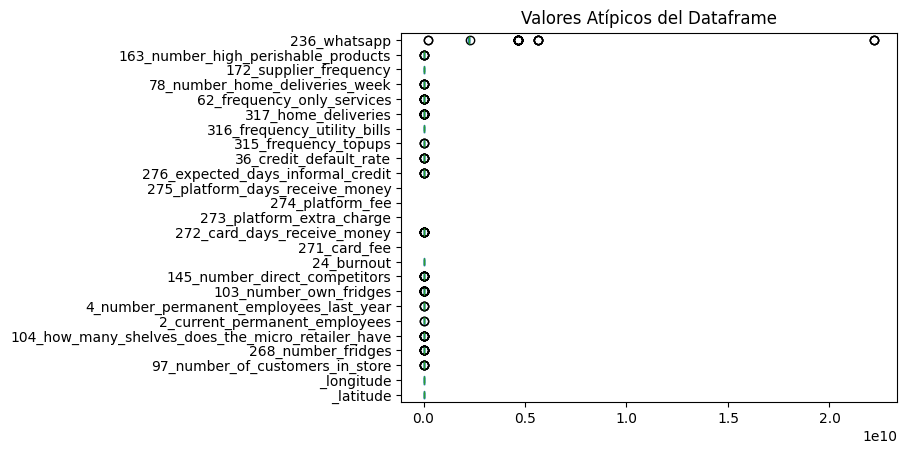

In [6]:
fig = plt.figure(figsize =(15, 8))
df1.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [7]:
df2=df1.select_dtypes(include=['number'])
df2.isnull().sum()

_latitude                                              0
_longitude                                             0
97_number_of_customers_in_store                        0
268_number_fridges                                     0
104_how_many_shelves_does_the_micro_retailer_have      0
2_current_permanent_employees                          0
4_number_permanent_employees_last_year                 0
103_number_own_fridges                                 0
145_number_direct_competitors                          0
24_burnout                                             0
271_card_fee                                         171
272_card_days_receive_money                            0
273_platform_extra_charge                            171
274_platform_fee                                     171
275_platform_days_receive_money                      171
276_expected_days_informal_credit                      0
36_credit_default_rate                                 0
315_frequency_topups           

In [8]:
y=df2
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido _latitude                                            1.911117e+01
_longitude                                          -9.809030e+01
97_number_of_customers_in_store                      6.591777e+00
268_number_fridges                                   1.020693e+01
104_how_many_shelves_does_the_micro_retailer_have    5.581292e+01
2_current_permanent_employees                        1.371533e+01
4_number_permanent_employees_last_year               1.242350e+01
103_number_own_fridges                               8.984091e+00
145_number_direct_competitors                        1.382033e+01
24_burnout                                           1.037826e+01
271_card_fee                                                  NaN
272_card_days_receive_money                          3.621305e+00
273_platform_extra_charge                                     NaN
274_platform_fee                                              NaN
275_platform_days_receive_money                   

In [9]:
outliers= df2[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [10]:
df3= df2[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df3

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,1.0,3.0,4.0,...,10.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,0.0,2.224524e+09
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,1.0,4.0,4.0,...,10.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,NaN,2.224524e+09
2,19.058655,-98.232300,0.0,0.0,24.0,2.0,2.0,1.0,0.0,4.0,...,10.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,NaN,2.224524e+09
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,1.0,4.0,4.0,...,10.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,0.0,2.224524e+09
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,1.0,0.0,4.0,...,15.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,0.0,2.224524e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,4.0,2.0,2.0,5.0,7.0,...,2.0,0.0,1.0,7.0,8.0,1.0,NaN,5.0,0.0,2.212380e+09
167,19.042794,-98.193802,1.0,5.0,5.0,4.0,2.0,2.0,5.0,7.0,...,2.0,0.0,1.0,7.0,8.0,1.0,NaN,5.0,0.0,2.212380e+09
168,19.042809,-98.193439,3.0,1.0,1.0,4.0,2.0,2.0,5.0,7.0,...,2.0,0.0,1.0,7.0,8.0,1.0,NaN,5.0,0.0,2.212380e+09
169,19.042558,-98.193818,0.0,1.0,1.0,4.0,2.0,2.0,5.0,7.0,...,2.0,0.0,1.0,7.0,8.0,1.0,NaN,5.0,0.0,2.212380e+09


In [12]:
valores_nulos=df3.isnull().sum()
valores_nulos

_latitude                                              0
_longitude                                             0
97_number_of_customers_in_store                        4
268_number_fridges                                     3
104_how_many_shelves_does_the_micro_retailer_have      3
2_current_permanent_employees                          1
4_number_permanent_employees_last_year                 1
103_number_own_fridges                                 1
145_number_direct_competitors                          5
24_burnout                                             0
271_card_fee                                         171
272_card_days_receive_money                            3
273_platform_extra_charge                            171
274_platform_fee                                     171
275_platform_days_receive_money                      171
276_expected_days_informal_credit                      6
36_credit_default_rate                                 6
315_frequency_topups           

In [13]:
dfclean=df3.copy()
dfclean=dfclean.fillna(round(df3.mean(),1))
dfclean.head(3)

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,1.0,3.0,4.0,...,10.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,0.0,2.224524e+09
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,1.0,4.0,4.0,...,10.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,6.7,2.224524e+09
2,19.058655,-98.232300,0.0,0.0,24.0,2.0,2.0,1.0,0.0,4.0,...,10.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,6.7,2.224524e+09


In [14]:
valores_nulos=dfclean.isnull().sum()
valores_nulos

_latitude                                              0
_longitude                                             0
97_number_of_customers_in_store                        0
268_number_fridges                                     0
104_how_many_shelves_does_the_micro_retailer_have      0
2_current_permanent_employees                          0
4_number_permanent_employees_last_year                 0
103_number_own_fridges                                 0
145_number_direct_competitors                          0
24_burnout                                             0
271_card_fee                                         171
272_card_days_receive_money                            0
273_platform_extra_charge                            171
274_platform_fee                                     171
275_platform_days_receive_money                      171
276_expected_days_informal_credit                      0
36_credit_default_rate                                 0
315_frequency_topups           

In [15]:
dfcuali=df.select_dtypes(exclude=['number'])
dffull=pd.concat([dfclean,dfcuali],axis=1)
dffull.head(3)

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,235_email
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,1.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,1.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
2,19.058655,-98.232300,0.0,0.0,24.0,2.0,2.0,1.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN


In [16]:
freq_tbl(dffull)

                               _record_id  frequency  percentage  \
0    dff2998e-af74-4de6-8efd-488aca24e67b          1    0.005848   
1    53c25f08-1c1b-4c1c-97d5-b45c940735cc          1    0.005848   
2    af5c48b5-a916-47a6-aacc-1128ea1e728e          1    0.005848   
3    4790411b-df1d-44f0-a659-6d99e26ae765          1    0.005848   
4    e70db20a-25db-412b-9a71-7df285c92a3d          1    0.005848   
..                                    ...        ...         ...   
166  75bcc709-90ff-4db7-bb82-293f2f72f3ae          1    0.005848   
167  bd59c8b6-81cb-4698-8cfd-dbab7f01ef21          1    0.005848   
168  94b1c6bc-1fb8-4895-aacc-c2604dc12b93          1    0.005848   
169  d9ff4194-657e-4fb4-b5f4-b7e8b350a646          1    0.005848   
170  bf720ff0-3b7d-47ed-ba49-f5d4bfb7293c          1    0.005848   

     cumulative_perc  
0           0.005848  
1           0.011696  
2           0.017544  
3           0.023392  
4           0.029240  
..               ...  
166         0.976608  

In [17]:
pd.options.display.max_rows = None

In [31]:
t1=freq_tbl(dffull['28_prefered_payment_method'])
t2=freq_tbl(dffull['102_does_the_micro_retailer_sells_fresh_products_'])
t3=freq_tbl(dffull['79_delivery_vehicle'])
t4=freq_tbl(dffull['66_percentaje_services_income'])
t5=freq_tbl(dffull['108_does_the_micro_retailer_has_a_barred_window_'])
t6=freq_tbl(dffull['38_average_margin_profits'])
t7=freq_tbl(dffull['155_sales_registers_used_for'])
t8=freq_tbl(dffull['157_frequency_organize_shelves'])
t9=freq_tbl(dffull['158_charact_organize_products_on_shelves'])
t10=freq_tbl(dffull['161_actions_stockouts'])
t11=freq_tbl(dffull['162_inventory_extra_space'])
t12=freq_tbl(dffull['56_procurement_changes_pandemic'])
t13=freq_tbl(dffull['20_reviews_finances_monthly'])
t14=freq_tbl(dffull['184_store_devices'])
t15=freq_tbl(dffull['185_place_orders_suppliers'])
t16=freq_tbl(dffull['186_internet_connection'])
t17=freq_tbl(dffull['189_payment_methods'])
t18=freq_tbl(dffull['18_sales_records'])
t19=freq_tbl(dffull['192_procurement_planning_tools'])
t20=freq_tbl(dffull['193_sales_planning_tools'])

In [33]:
Filtro1= t1[t1['frequency']>1]
Filtro2= t2[t2['frequency']>1]
Filtro3= t3[t3['frequency']>1]
Filtro4= t4[t4['frequency']>1]
Filtro5= t5[t5['frequency']>1]
Filtro6= t6[t6['frequency']>1]
Filtro7= t7[t7['frequency']>1]
Filtro8= t8[t8['frequency']>1]
Filtro9= t9[t9['frequency']>1]
Filtro10= t10[t10['frequency']>1]
Filtro11= t11[t11['frequency']>1]
Filtro12= t12[t12['frequency']>1]
Filtro13= t13[t13['frequency']>1]
Filtro14= t14[t14['frequency']>1]
Filtro15= t15[t15['frequency']>1]
Filtro16= t16[t16['frequency']>1]
Filtro17= t17[t17['frequency']>1]
Filtro18= t18[t18['frequency']>1]
Filtro19= t19[t19['frequency']>1]
Filtro20= t20[t20['frequency']>1]


In [34]:
Filtro_index1=Filtro1.set_index('28_prefered_payment_method')
Filtro_index2=Filtro2.set_index('102_does_the_micro_retailer_sells_fresh_products_')
Filtro_index3=Filtro3.set_index('79_delivery_vehicle')
Filtro_index4=Filtro4.set_index('66_percentaje_services_income')
Filtro_index5=Filtro5.set_index('108_does_the_micro_retailer_has_a_barred_window_')
Filtro_index6=Filtro6.set_index('38_average_margin_profits')
Filtro_index7=Filtro7.set_index('155_sales_registers_used_for')
Filtro_index8=Filtro8.set_index('157_frequency_organize_shelves')
Filtro_index9=Filtro9.set_index('158_charact_organize_products_on_shelves')
Filtro_index10=Filtro10.set_index('161_actions_stockouts')
Filtro_index11=Filtro11.set_index('162_inventory_extra_space')
Filtro_index12=Filtro12.set_index('56_procurement_changes_pandemic')
Filtro_index13=Filtro13.set_index('20_reviews_finances_monthly')
Filtro_index14=Filtro14.set_index('184_store_devices')
Filtro_index15=Filtro15.set_index('185_place_orders_suppliers')
Filtro_index16=Filtro16.set_index('186_internet_connection')
Filtro_index17=Filtro17.set_index('189_payment_methods')
Filtro_index18=Filtro18.set_index('18_sales_records')
Filtro_index19=Filtro19.set_index('192_procurement_planning_tools')
Filtro_index20=Filtro20.set_index('193_sales_planning_tools')

In [38]:
Filtro_indexf1= Filtro_index1.drop(['percentage','cumulative_perc'], axis=1)
Filtro_indexf2= Filtro_index2.drop(['percentage','cumulative_perc'], axis=1)
Filtro_indexf3= Filtro_index3.drop(['percentage','cumulative_perc'], axis=1)
Filtro_indexf4= Filtro_index4.drop(['percentage','cumulative_perc'], axis=1)
Filtro_indexf5= Filtro_index5.drop(['percentage','cumulative_perc'], axis=1)
Filtro_indexf6= Filtro_index6.drop(['percentage','cumulative_perc'], axis=1)
Filtro_indexf7= Filtro_index7.drop(['percentage','cumulative_perc'], axis=1)
Filtro_indexf8= Filtro_index8.drop(['percentage','cumulative_perc'], axis=1)
Filtro_indexf9= Filtro_index9.drop(['percentage','cumulative_perc'], axis=1)
Filtro_indexf10= Filtro_index10.drop(['percentage','cumulative_perc'], axis=1)
Filtro_indexf11= Filtro_index11.drop(['percentage','cumulative_perc'], axis=1)
Filtro_indexf12= Filtro_index12.drop(['percentage','cumulative_perc'], axis=1)
Filtro_indexf13= Filtro_index13.drop(['percentage','cumulative_perc'], axis=1)
Filtro_indexf14= Filtro_index14.drop(['percentage','cumulative_perc'], axis=1)
Filtro_indexf15= Filtro_index15.drop(['percentage','cumulative_perc'], axis=1)
Filtro_indexf16= Filtro_index16.drop(['percentage','cumulative_perc'], axis=1)
Filtro_indexf17= Filtro_index17.drop(['percentage','cumulative_perc'], axis=1)
Filtro_indexf18= Filtro_index18.drop(['percentage','cumulative_perc'], axis=1)
Filtro_indexf19= Filtro_index19.drop(['percentage','cumulative_perc'], axis=1)
Filtro_indexf20= Filtro_index20.drop(['percentage','cumulative_perc'], axis=1)

,frequency
185_place_orders_suppliers,
En persona,20
Mensajería instantánea (e.g. WhatsApp),8
"En persona,Llamada telefónica,Mensajería instantánea (e.g. WhatsApp)",7
Llamada telefónica,6
"En persona,Mensajería instantánea (e.g. WhatsApp)",5
"En persona,Llamada telefónica",5
Página web del proveedor,5
"Mensaje de texto (SMS),Mensajería instantánea (e.g. WhatsApp)",2
"En persona,Página web del proveedor",2


<Axes: xlabel='193_sales_planning_tools'>

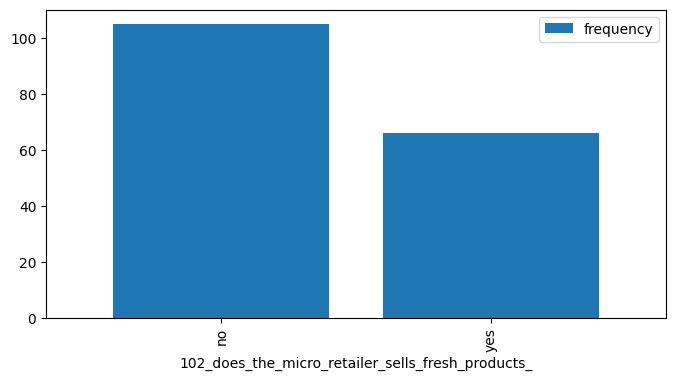

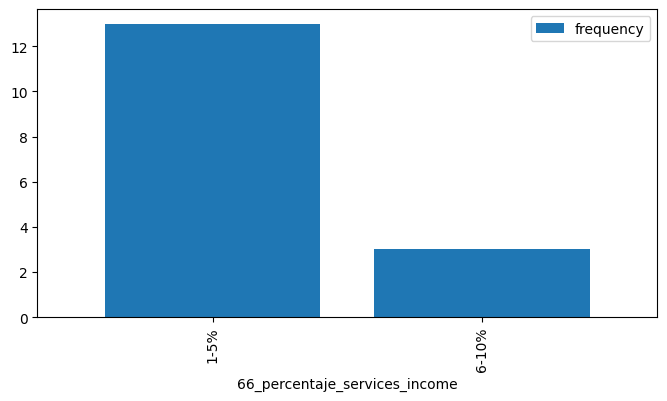

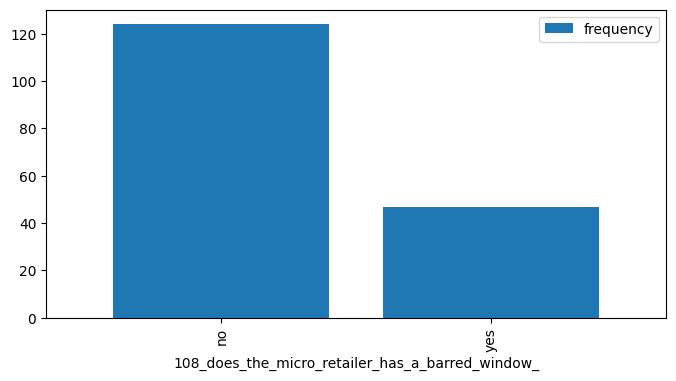

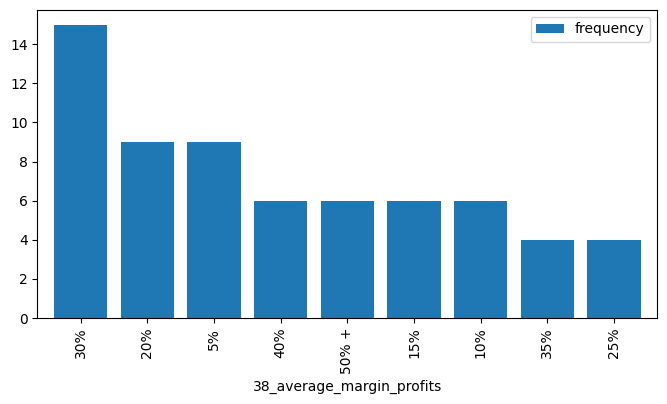

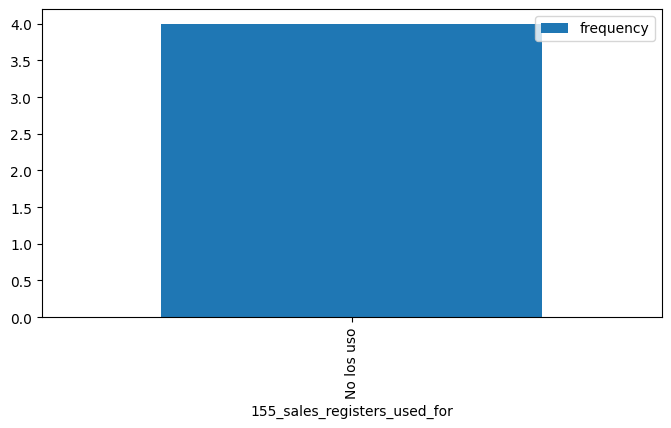

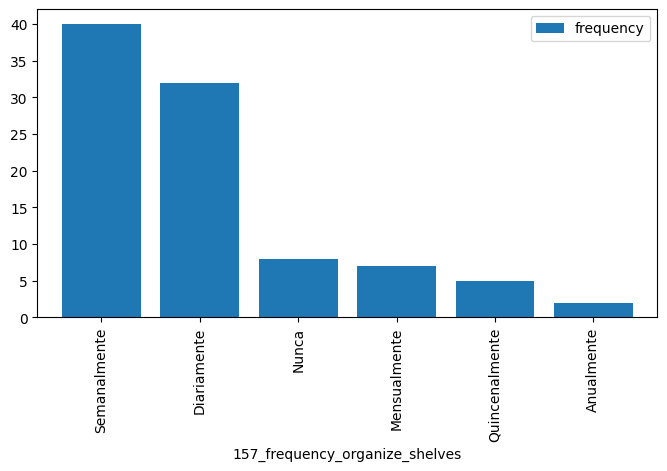

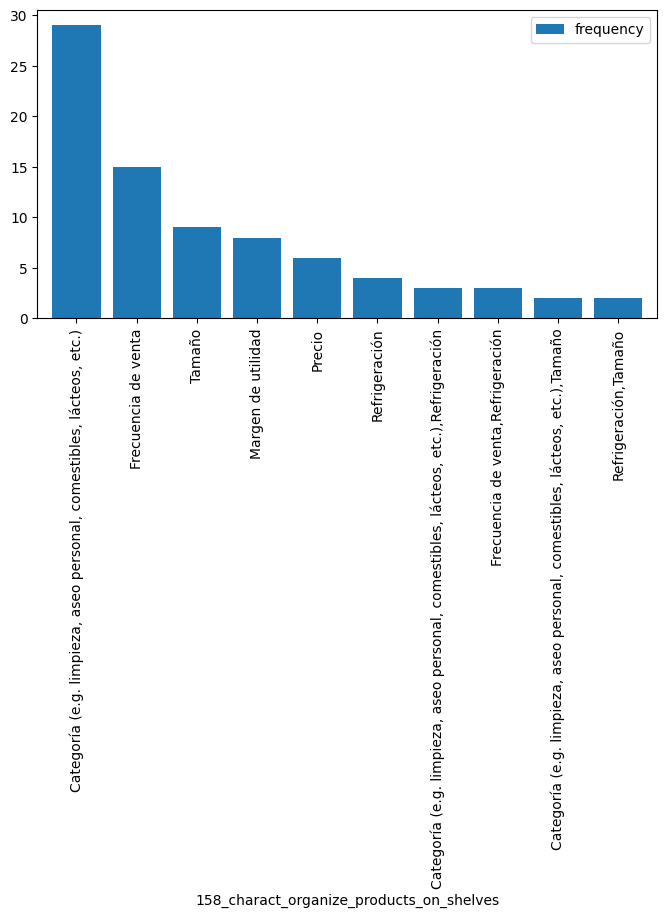

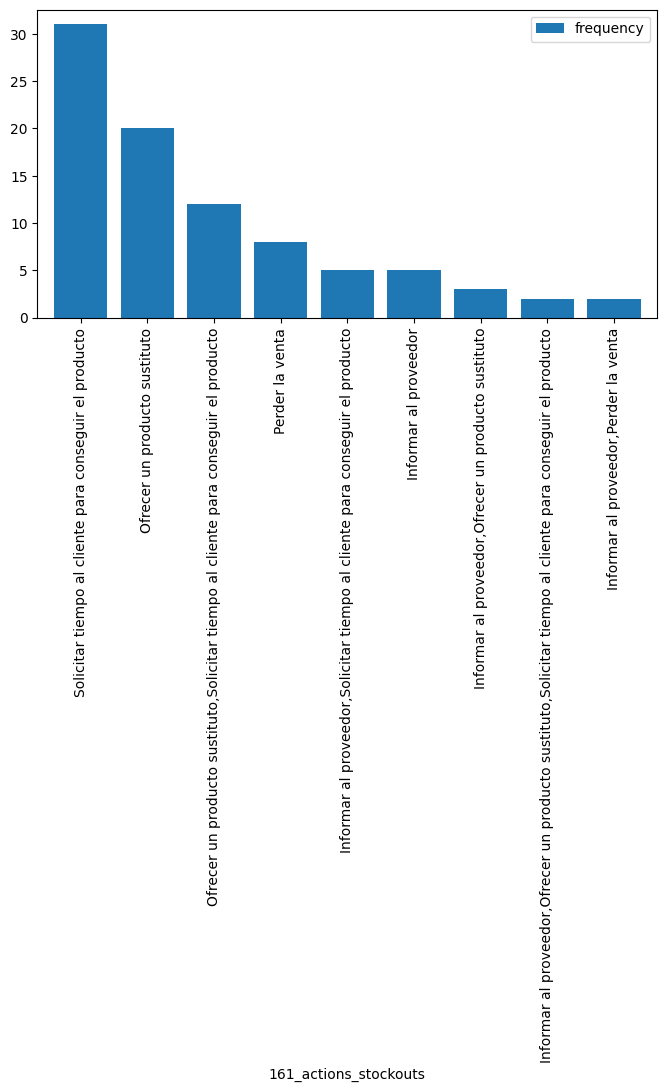

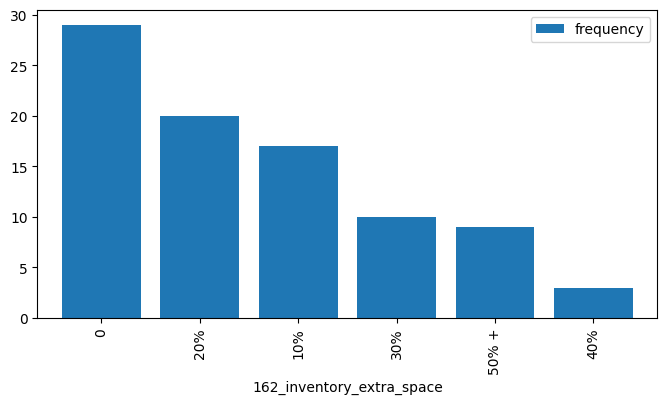

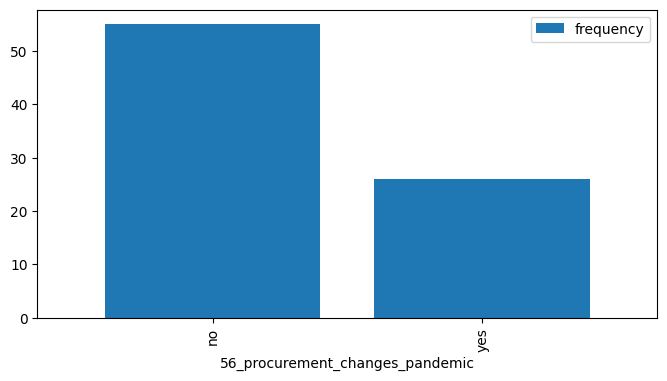

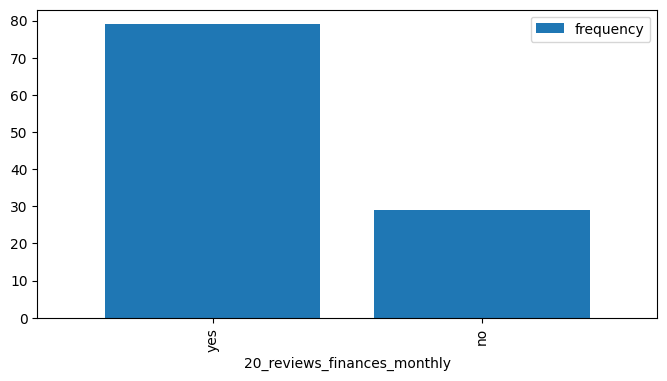

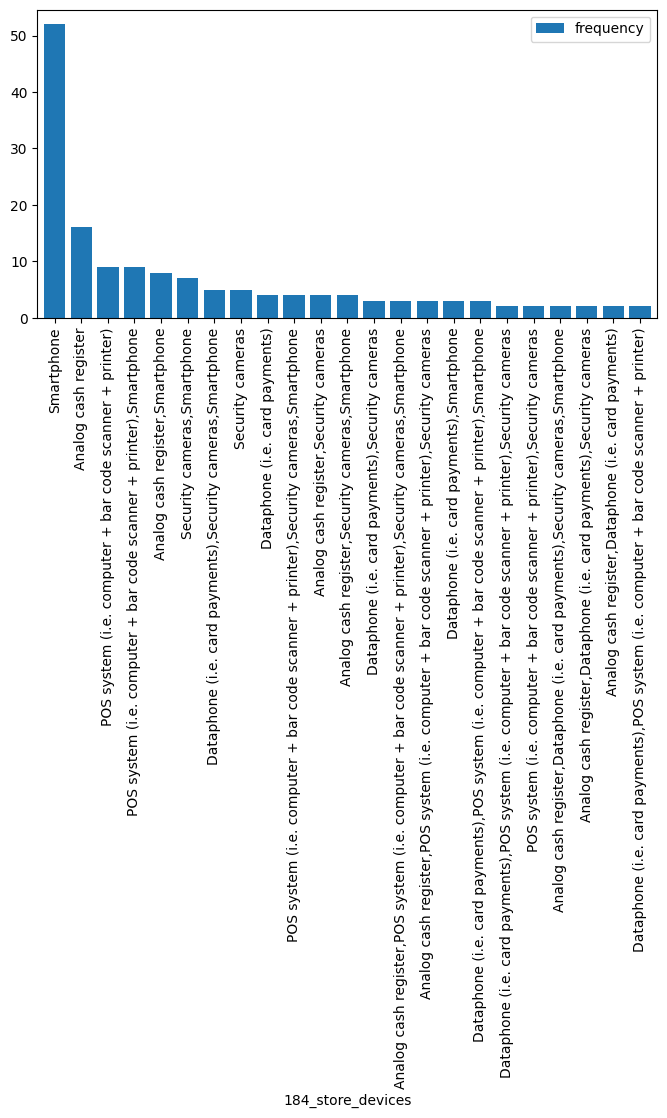

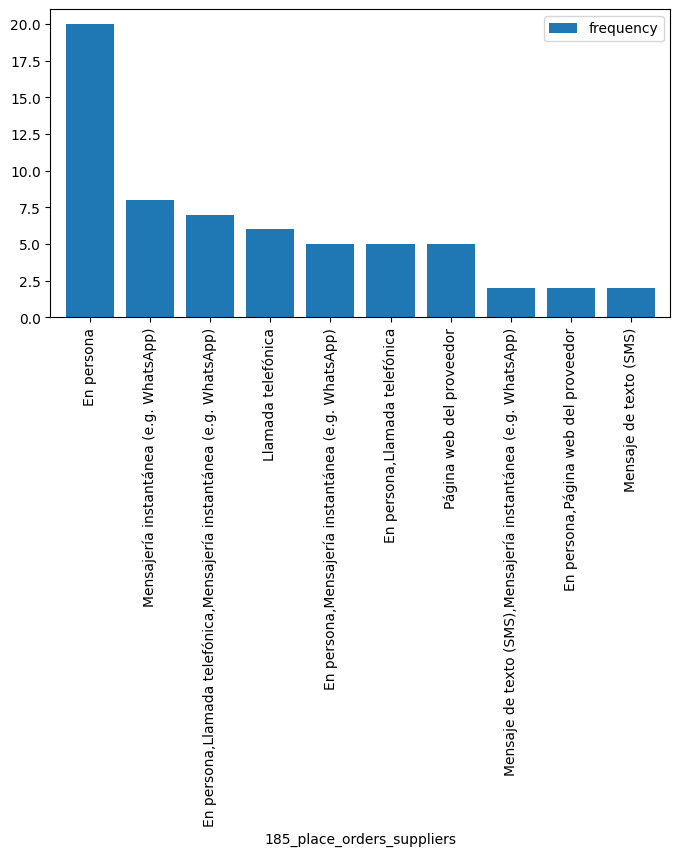

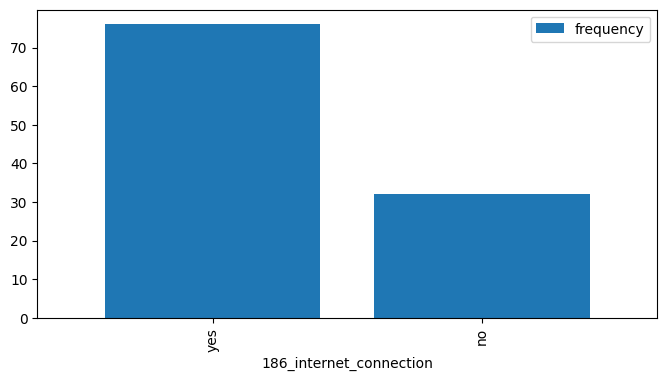

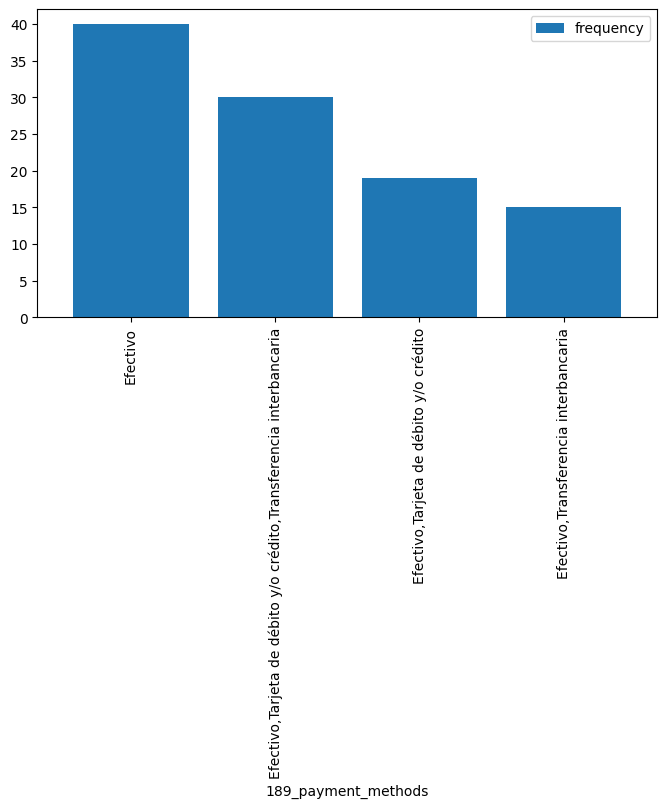

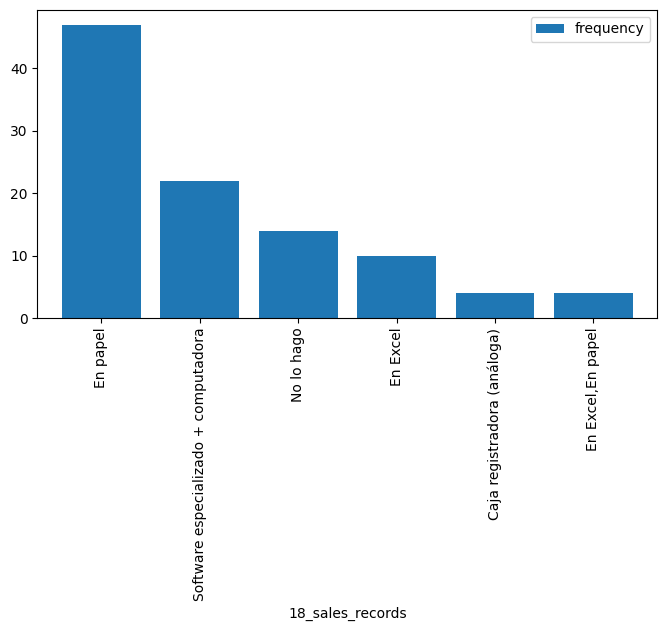

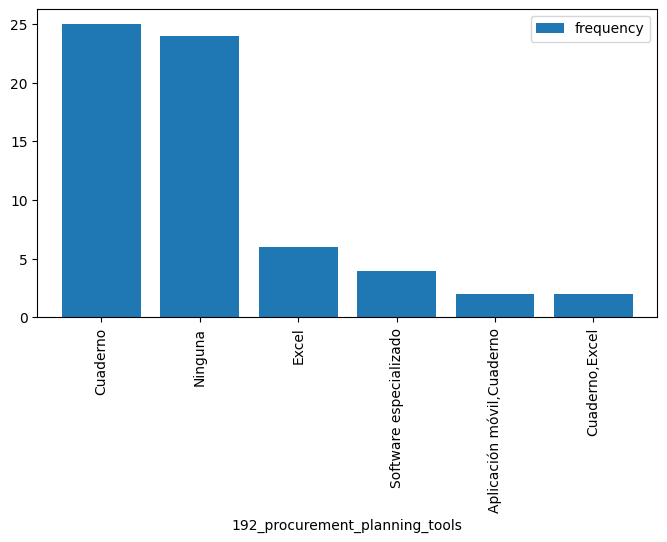

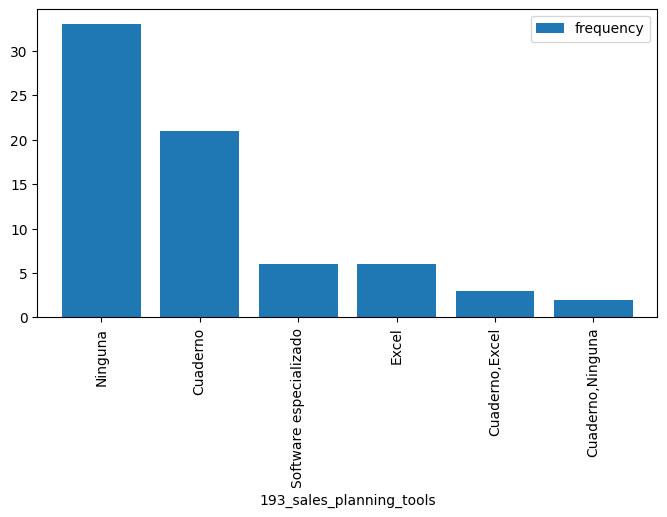

In [41]:
Filtro_indexf2.plot(kind = 'bar', width=0.8, figsize=(8,4))
Filtro_indexf4.plot(kind = 'bar', width=0.8, figsize=(8,4))
Filtro_indexf5.plot(kind = 'bar', width=0.8, figsize=(8,4))
Filtro_indexf6.plot(kind = 'bar', width=0.8, figsize=(8,4))
Filtro_indexf7.plot(kind = 'bar', width=0.8, figsize=(8,4))
Filtro_indexf8.plot(kind = 'bar', width=0.8, figsize=(8,4))
Filtro_indexf9.plot(kind = 'bar', width=0.8, figsize=(8,4))
Filtro_indexf10.plot(kind = 'bar', width=0.8, figsize=(8,4))
Filtro_indexf11.plot(kind = 'bar', width=0.8, figsize=(8,4))
Filtro_indexf12.plot(kind = 'bar', width=0.8, figsize=(8,4))
Filtro_indexf13.plot(kind = 'bar', width=0.8, figsize=(8,4))
Filtro_indexf14.plot(kind = 'bar', width=0.8, figsize=(8,4))
Filtro_indexf15.plot(kind = 'bar', width=0.8, figsize=(8,4))
Filtro_indexf16.plot(kind = 'bar', width=0.8, figsize=(8,4))
Filtro_indexf17.plot(kind = 'bar', width=0.8, figsize=(8,4))
Filtro_indexf18.plot(kind = 'bar', width=0.8, figsize=(8,4))
Filtro_indexf19.plot(kind = 'bar', width=0.8, figsize=(8,4))
Filtro_indexf20.plot(kind = 'bar', width=0.8, figsize=(8,4))


<Axes: xlabel='193_sales_planning_tools'>

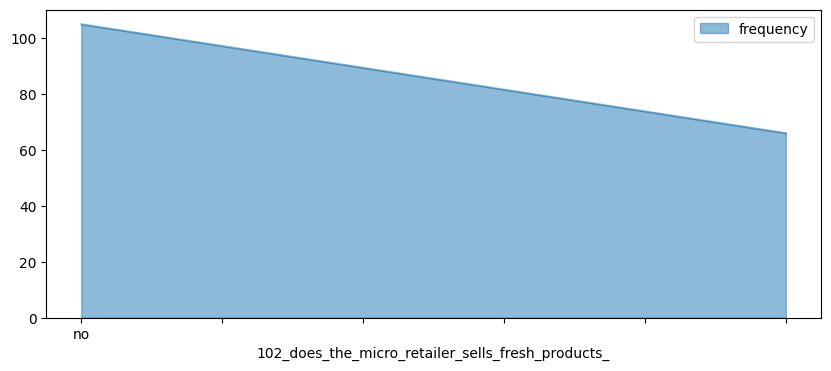

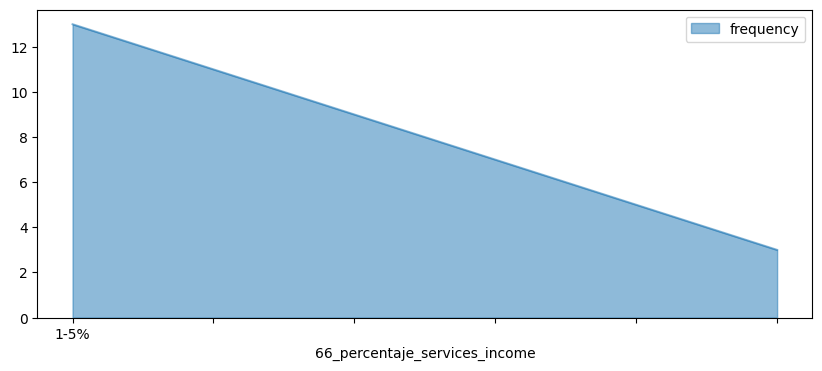

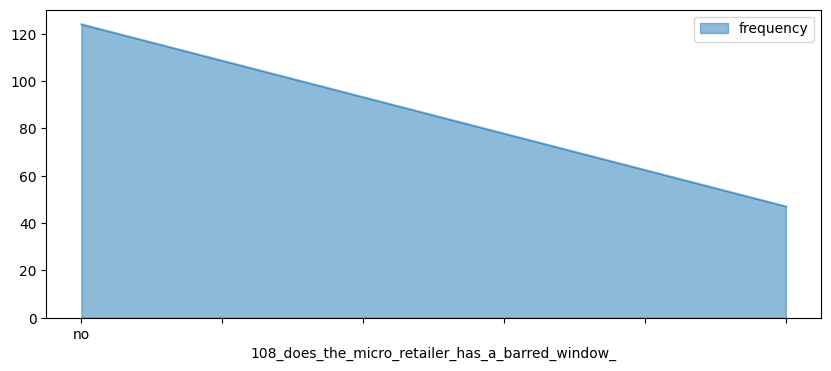

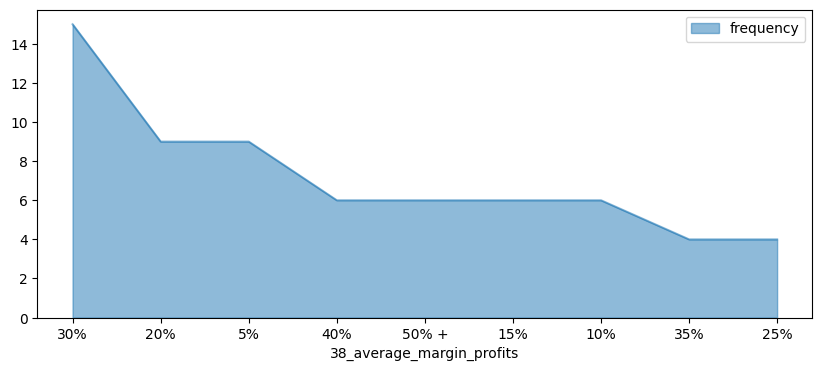

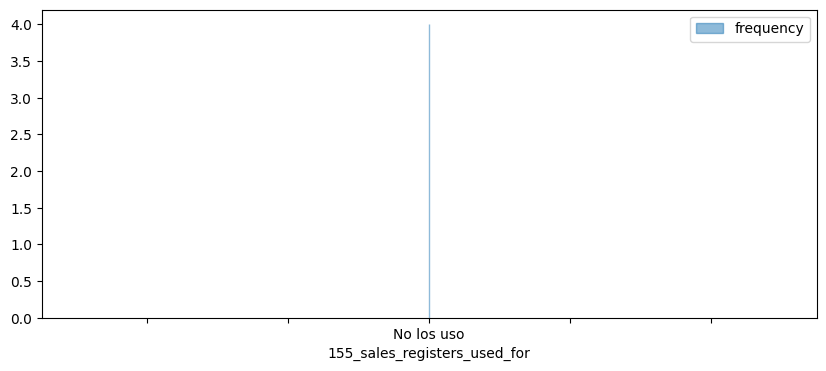

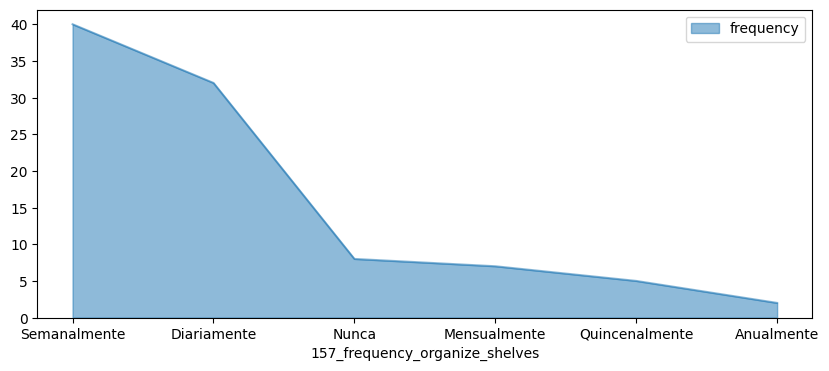

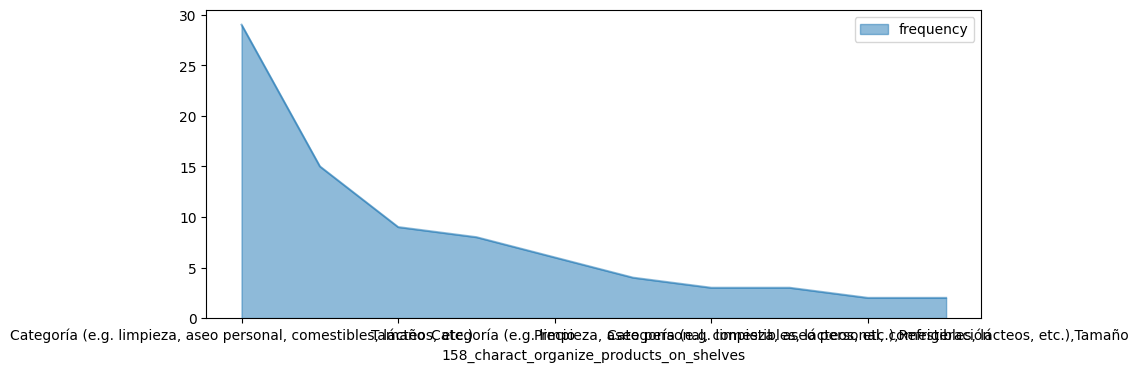

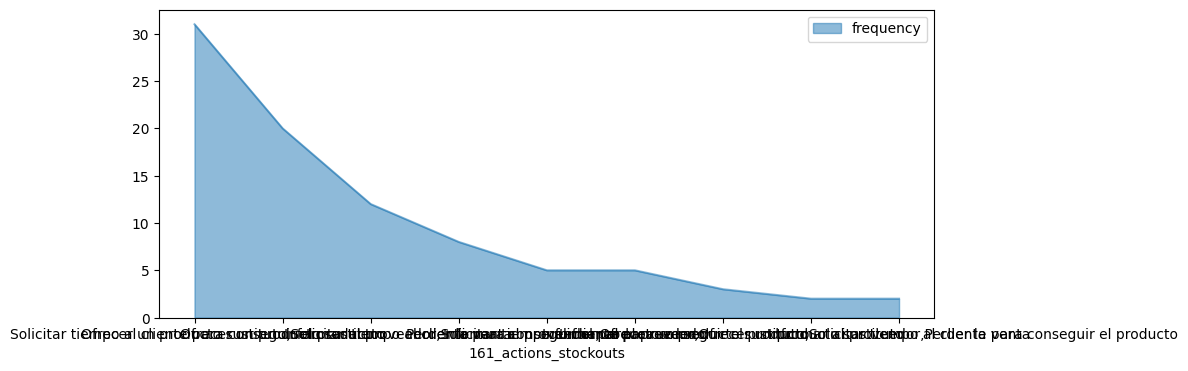

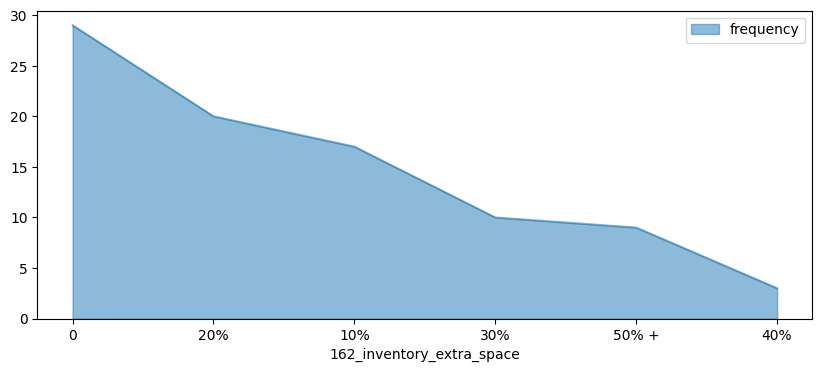

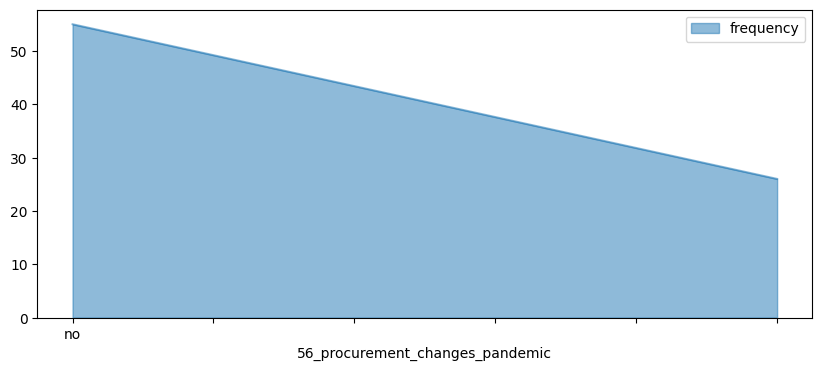

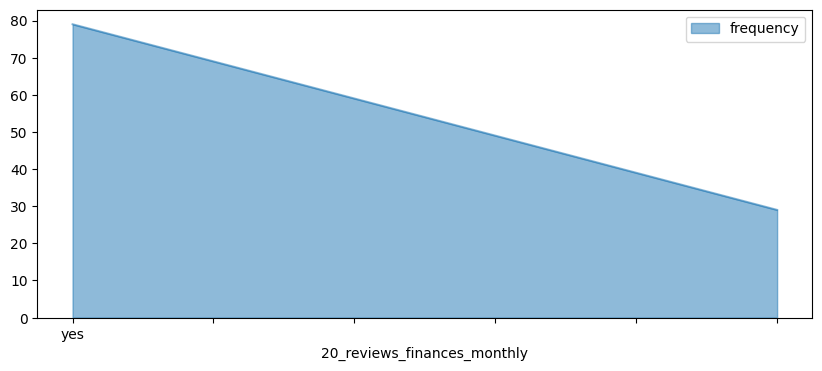

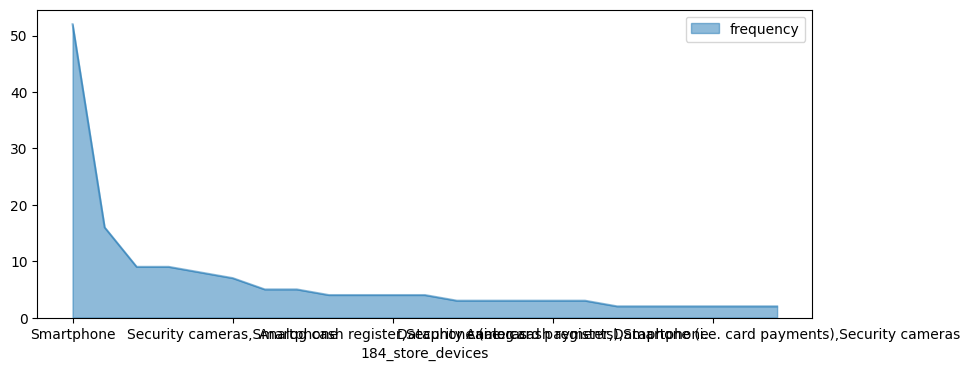

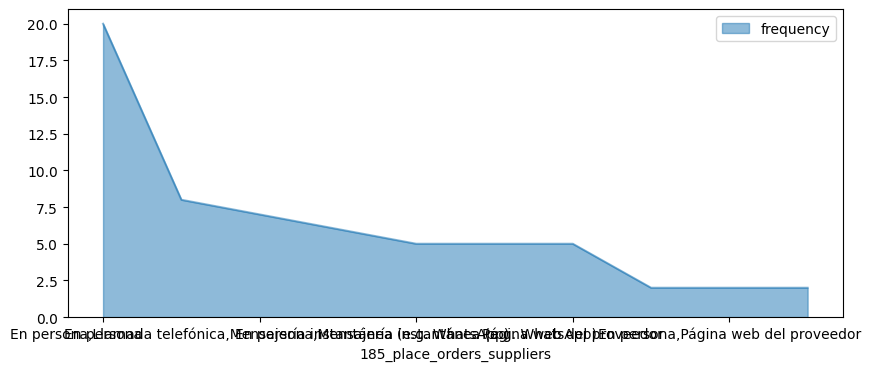

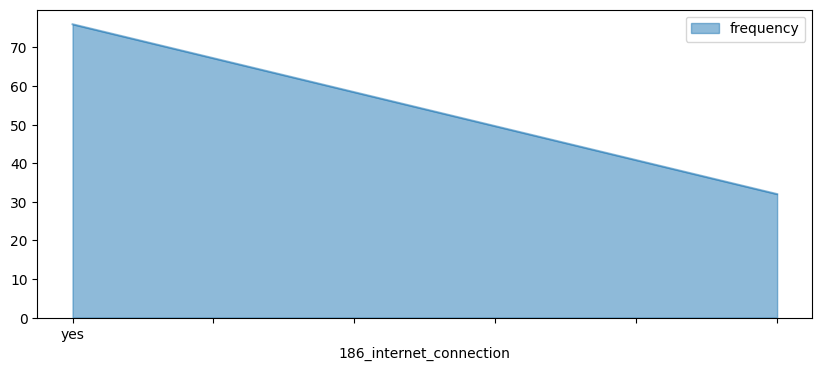

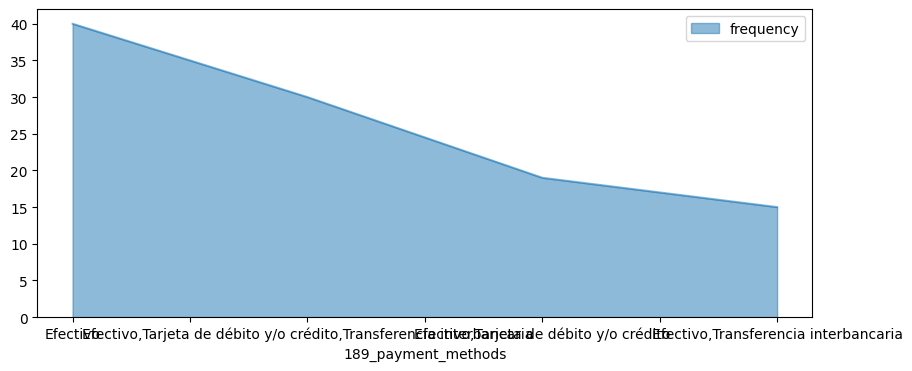

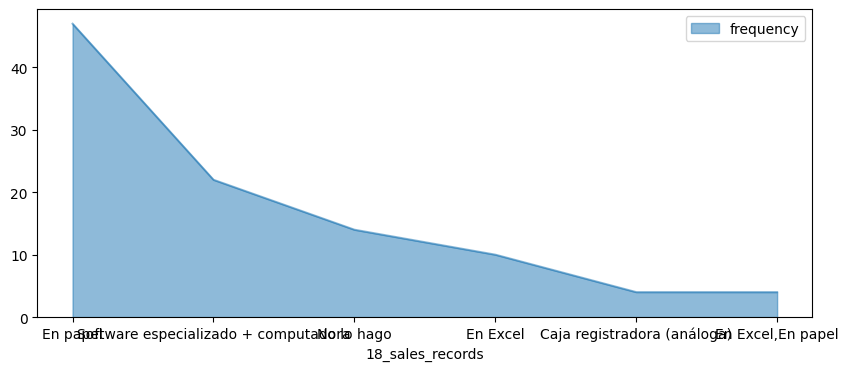

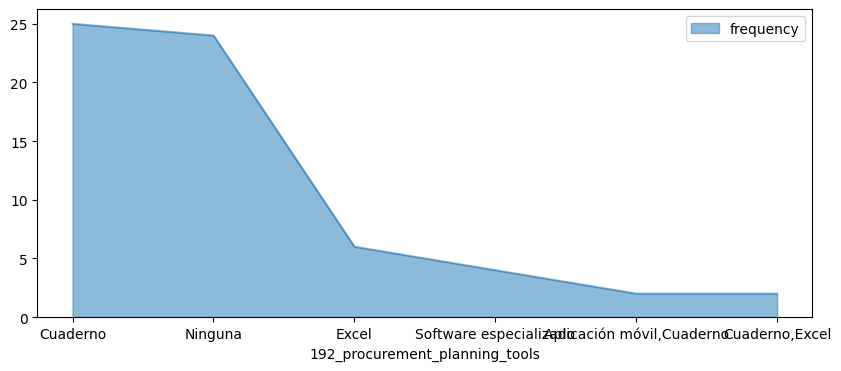

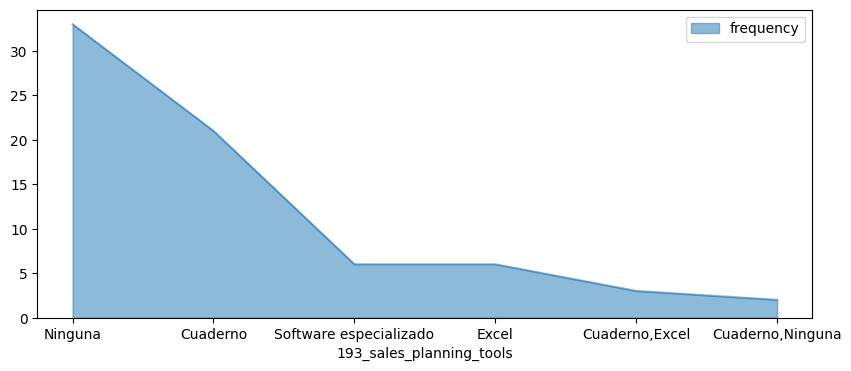

In [43]:
Filtro_indexf2.plot(kind='area', figsize=(10,4),alpha = 0.5)
Filtro_indexf4.plot(kind='area', figsize=(10,4),alpha = 0.5)
Filtro_indexf5.plot(kind='area', figsize=(10,4),alpha = 0.5)
Filtro_indexf6.plot(kind='area', figsize=(10,4),alpha = 0.5)
Filtro_indexf7.plot(kind='area', figsize=(10,4),alpha = 0.5)
Filtro_indexf8.plot(kind='area', figsize=(10,4),alpha = 0.5)
Filtro_indexf9.plot(kind='area', figsize=(10,4),alpha = 0.5)
Filtro_indexf10.plot(kind='area', figsize=(10,4),alpha = 0.5)
Filtro_indexf11.plot(kind='area', figsize=(10,4),alpha = 0.5)
Filtro_indexf12.plot(kind='area', figsize=(10,4),alpha = 0.5)
Filtro_indexf13.plot(kind='area', figsize=(10,4),alpha = 0.5)
Filtro_indexf14.plot(kind='area', figsize=(10,4),alpha = 0.5)
Filtro_indexf15.plot(kind='area', figsize=(10,4),alpha = 0.5)
Filtro_indexf16.plot(kind='area', figsize=(10,4),alpha = 0.5)
Filtro_indexf17.plot(kind='area', figsize=(10,4),alpha = 0.5)
Filtro_indexf18.plot(kind='area', figsize=(10,4),alpha = 0.5)
Filtro_indexf19.plot(kind='area', figsize=(10,4),alpha = 0.5)
Filtro_indexf20.plot(kind='area', figsize=(10,4),alpha = 0.5)

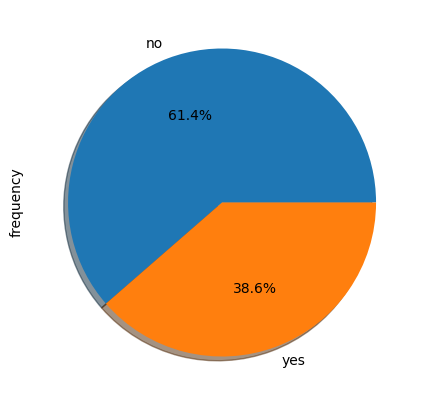

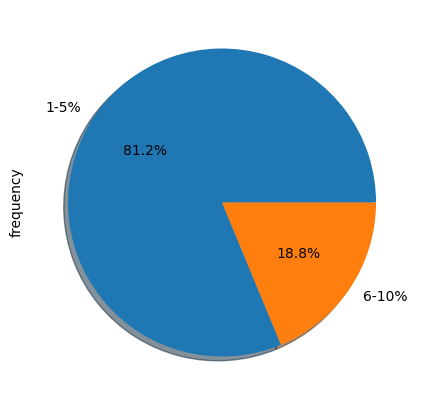

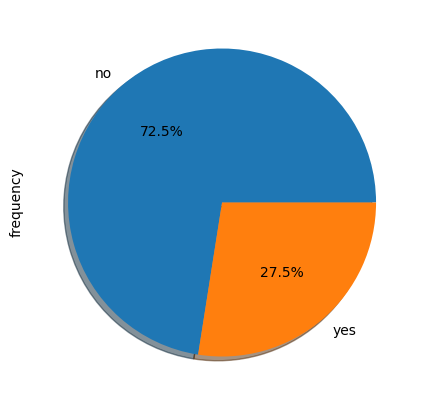

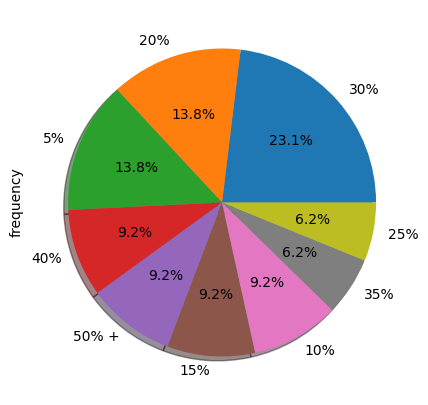

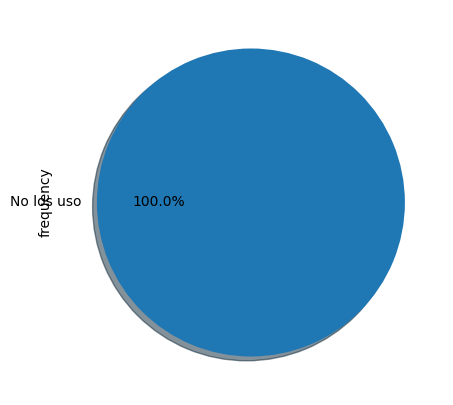

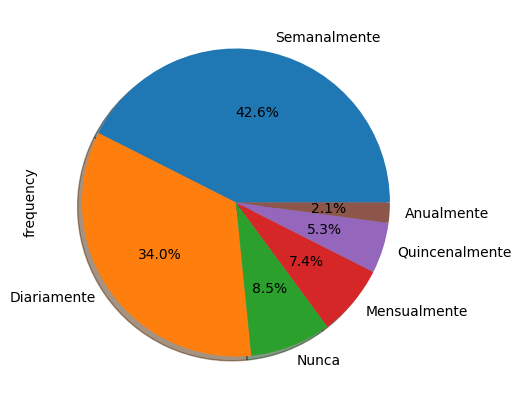

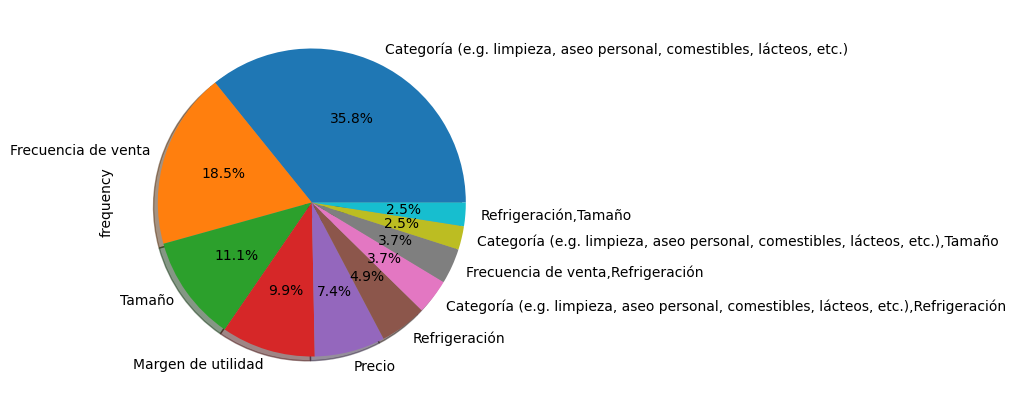

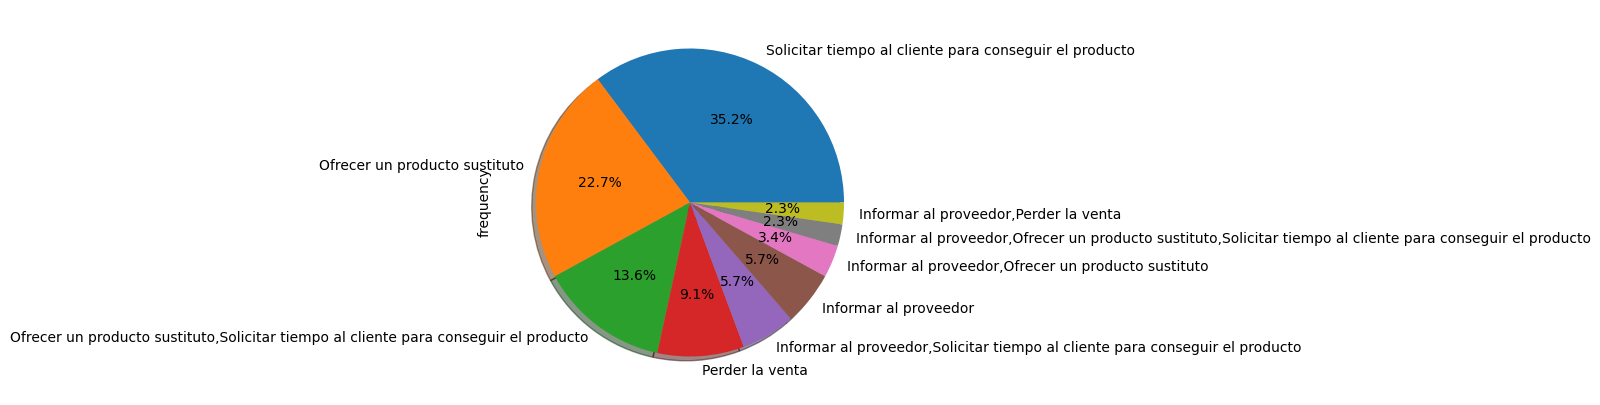

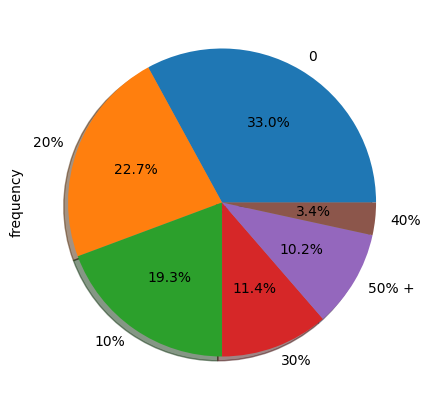

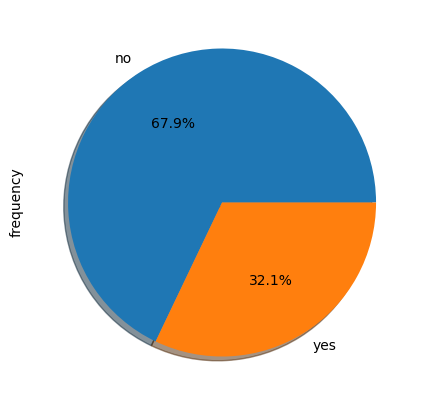

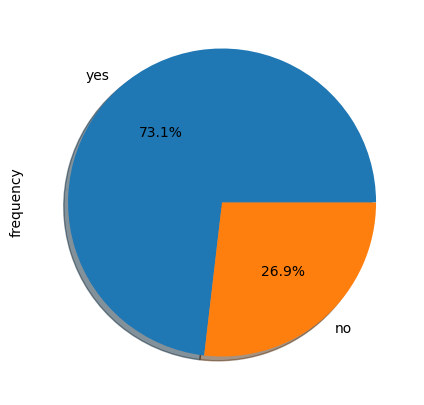

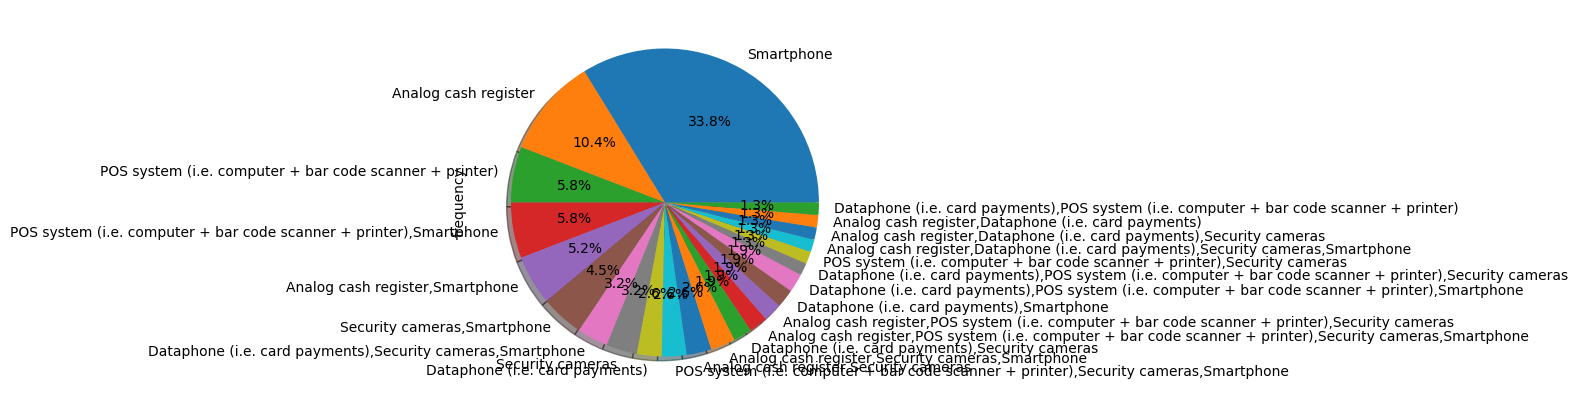

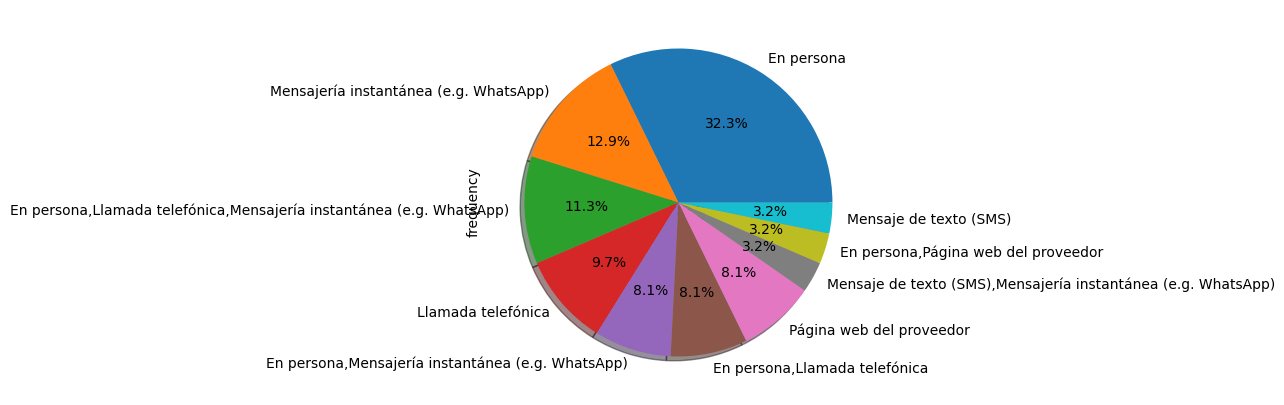

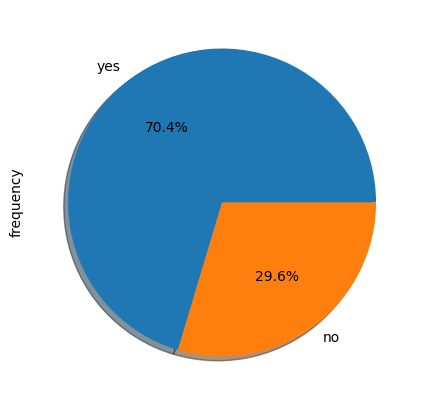

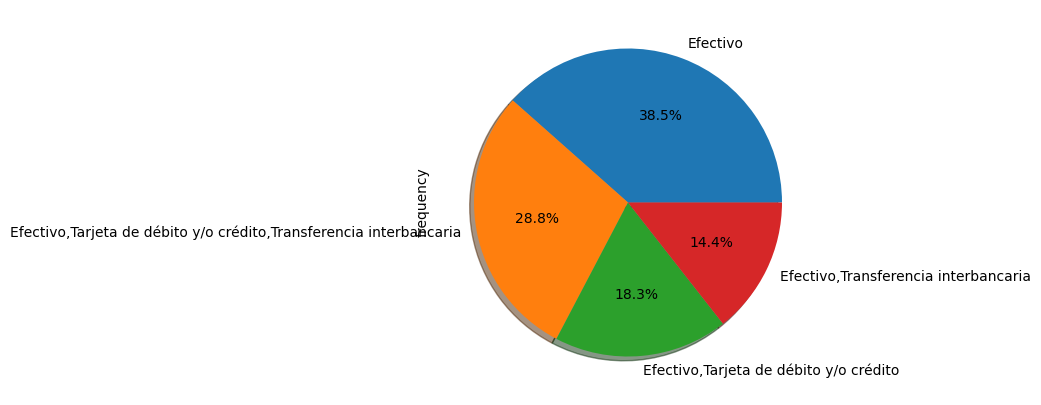

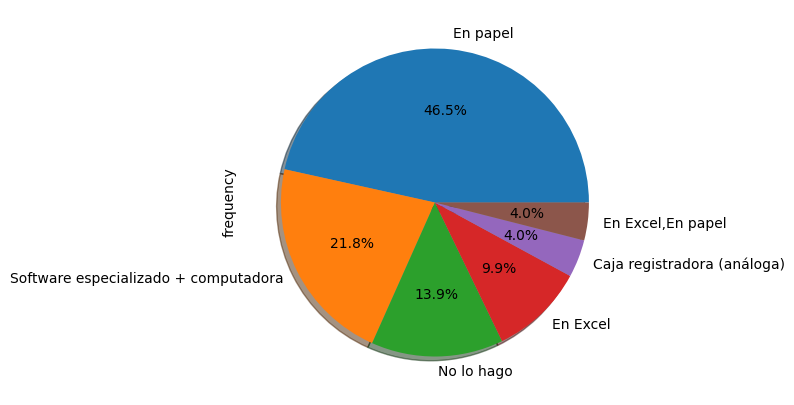

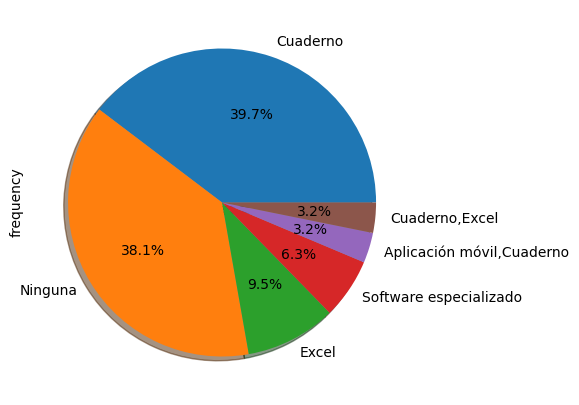

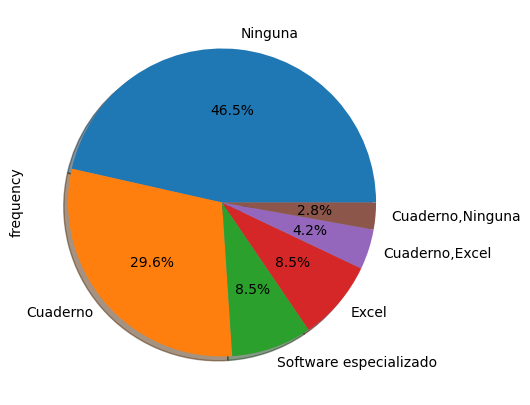

In [55]:
Filtro_indexf2["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")
plt.show()
Filtro_indexf4["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")
plt.show()
Filtro_indexf5["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")
plt.show()
Filtro_indexf6["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")
plt.show()
Filtro_indexf7["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")
plt.show()
Filtro_indexf8["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")
plt.show()
Filtro_indexf9["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")
plt.show()
Filtro_indexf10["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")
plt.show()
Filtro_indexf11["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")
plt.show()
Filtro_indexf12["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")
plt.show()
Filtro_indexf13["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")
plt.show()
Filtro_indexf14["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")
plt.show()
Filtro_indexf15["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")
plt.show()
Filtro_indexf16["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")
plt.show()
Filtro_indexf17["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")
plt.show()
Filtro_indexf18["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")
plt.show()
Filtro_indexf19["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")
plt.show()
Filtro_indexf20["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")
plt.show()